<a href="https://colab.research.google.com/github/paulaprado1904/MachineLearning/blob/main/Cap%C3%ADtulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os  # Importa o módulo que permite interagir com o sistema operacional (manipulação de diretórios e arquivos)
import tarfile  # Importa o módulo que permite trabalhar com arquivos tar, como abrir, ler e extrair
import urllib.request  # Importa o módulo que permite fazer requisições HTTP, como baixar arquivos da internet

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"  # URL base onde os dados estão armazenados
HOUSING_PATH = os.path.join("datasets", "housing")  # Define o caminho local onde os dados serão armazenados
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"  # URL completa do arquivo de dados a ser baixado

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):  # Define uma função para baixar e extrair os dados
    if not os.path.isdir(housing_path):  # Verifica se o diretório não existe
        os.makedirs(housing_path)  # Cria o diretório se ele não existir
    tgz_path = os.path.join(housing_path, "housing.tgz")  # Define o caminho completo para o arquivo .tgz
    urllib.request.urlretrieve(housing_url, tgz_path)  # Baixa o arquivo da URL e salva no caminho especificado
    housing_tgz = tarfile.open(tgz_path)  # Abre o arquivo .tgz
    housing_tgz.extractall(path=housing_path)  # Extrai todos os conteúdos do arquivo .tgz para o diretório especificado
    housing_tgz.close()  # Fecha o arquivo .tgz


In [13]:
fetch_housing_data()

In [4]:
import pandas as pd  # Importa o módulo pandas, que oferece estruturas de dados e ferramentas de análise de dados

def load_housing_data(housing_path=HOUSING_PATH):  # Define uma função para carregar os dados de habitação
    csv_path = os.path.join(housing_path, "housing.csv")  # Define o caminho completo para o arquivo .csv
    return pd.read_csv(csv_path)  # Lê o arquivo .csv usando pandas e retorna um DataFrame com os dados


In [14]:
housing = load_housing_data()  # Chama a função load_housing_data para carregar os dados de habitação e os armazena na variável 'housing'
housing.head()  # Exibe as primeiras 5 linhas do DataFrame 'housing' para uma visualização rápida dos dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
from pathlib import Path  # Importa o módulo Path do pathlib, que fornece classes para manipulação de caminhos de arquivos e diretórios
import pandas as pd  # Importa o módulo pandas, usado para manipulação e análise de dados
import tarfile  # Importa o módulo tarfile, que permite trabalhar com arquivos tar, como abrir, ler e extrair
import urllib.request  # Importa o módulo urllib.request, que permite fazer requisições HTTP, como baixar arquivos da internet

def load_housing_data():  # Define uma função para carregar os dados de habitação
    tarball_path = Path("datasets/housing.tgz")  # Define o caminho do arquivo .tgz
    if not tarball_path.is_file():  # Verifica se o arquivo .tgz não existe
        Path("datasets").mkdir(parents=True, exist_ok=True)  # Cria o diretório 'datasets', incluindo os pais, se necessário
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # Define a URL do arquivo a ser baixado
        urllib.request.urlretrieve(url, tarball_path)  # Baixa o arquivo da URL e salva no caminho especificado
        with tarfile.open(tarball_path) as housing_tarball:  # Abre o arquivo .tgz
            housing_tarball.extractall(path="datasets")  # Extrai todos os conteúdos do arquivo .tgz para o diretório 'datasets'
    return pd.read_csv(Path("datasets/housing/housing.csv"))  # Lê o arquivo .csv usando pandas e retorna um DataFrame com os dados

housing = load_housing_data()  # Chama a função load_housing_data para carregar os dados de habitação e os armazena na variável 'housing'


In [8]:
housing["ocean_proximity"].value_counts()  # Conta e exibe a frequência de cada categoria na coluna 'ocean_proximity' do DataFrame 'housing'

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()  # Gera estatísticas descritivas para as colunas numéricas do DataFrame 'housing'

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


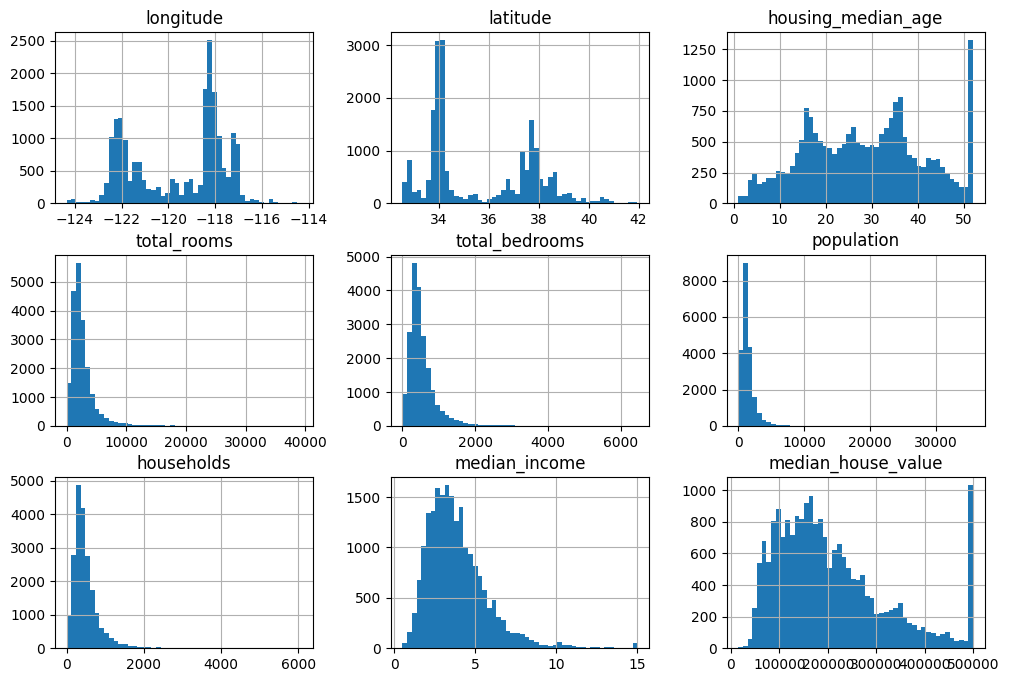

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [17]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [16]:
import numpy as np  # Importa o módulo numpy, que oferece suporte para arrays e funções matemáticas

def shuffle_and_split_data(data, test_ratio):  # Define uma função para embaralhar e dividir os dados em conjuntos de treinamento e teste
    shuffled_indices = np.random.permutation(len(data))  # Gera um array de índices embaralhados, com o mesmo comprimento dos dados
    test_set_size = int(len(data) * test_ratio)  # Calcula o tamanho do conjunto de teste com base na proporção fornecida
    test_indices = shuffled_indices[:test_set_size]  # Seleciona os primeiros índices embaralhados para o conjunto de teste
    train_indices = shuffled_indices[test_set_size:]  # Seleciona os índices restantes para o conjunto de treinamento
    return data.iloc[train_indices], data.iloc[test_indices]  # Retorna os dados divididos em conjuntos de treinamento e teste usando os índices selecionados

In [18]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)  # Chama a função shuffle_and_split_data para dividir o DataFrame 'housing' em conjuntos de treinamento e teste, com uma proporção de 0.2 para o conjunto de teste
len(train_set)  # Retorna o comprimento do conjunto de treinamento (número de linhas)

16512

In [19]:
len(test_set)  # Retorna o comprimento do conjunto de teste (número de linhas)

4128

In [20]:
from zlib import crc32  # Importa a função crc32 do módulo zlib, que calcula o checksum CRC-32

def is_id_in_test_set(identifier, test_ratio):  # Define uma função para verificar se um identificador está no conjunto de teste
    return crc32(np.int64(identifier)) < test_ratio * 2**32  # Calcula o checksum CRC-32 do identificador convertido para int64 e verifica se está abaixo do limite para o conjunto de teste

def split_data_with_id_hash(data, test_ratio, id_column):  # Define uma função para dividir os dados com base em um identificador
    ids = data[id_column]  # Extrai os identificadores da coluna especificada
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))  # Aplica a função is_id_in_test_set para cada identificador e retorna uma série indicando se está no conjunto de teste
    return data.loc[~in_test_set], data.loc[in_test_set]  # Retorna os dados divididos em conjuntos de treinamento e teste com base na série in_test_set


In [21]:
housing_with_id = housing.reset_index()  # Cria uma cópia do DataFrame 'housing' com um novo índice numérico
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")  # Chama a função split_data_with_id_hash para dividir os dados usando o novo índice como identificador e uma proporção de 0.2 para o conjunto de teste

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

#Explicação do Código
##Objetivo:

O código tem como objetivo criar uma nova coluna chamada income_cat no DataFrame housing, categorizando os valores da coluna median_income em diferentes grupos (bins).
##Função pd.cut:

pd.cut é uma função do pandas que é usada para segmentar e classificar os dados em intervalos. Ela é útil para criar variáveis categóricas a partir de variáveis contínuas.
##Argumentos da Função:

- housing["median_income"]: A coluna do DataFrame que contém os dados de renda mediana.

- bins: Lista de limites para definir os intervalos (bins):
[0., 1.5, 3.0, 4.5, 6., np.inf]:

0.: Limite inferior do primeiro bin.

1.5: Limite superior do primeiro bin e inferior do segundo bin.

3.0: Limite superior do segundo bin e inferior do terceiro bin.

4.5: Limite superior do terceiro bin e inferior do quarto bin.

6.: Limite superior do quarto bin e inferior do quinto bin.

np.inf: Limite superior do quinto bin (todos os valores acima de 6).

labels: Etiquetas para os bins:

[1, 2, 3, 4, 5]: Cada intervalo recebe um rótulo numérico correspondente.

##Resultado:

A nova coluna income_cat categoriza os valores de median_income em 5 categorias:

Renda mediana entre 0 e 1.5 -> Categoria 1

Renda mediana entre 1.5 e 3.0 -> Categoria 2

Renda mediana entre 3.0 e 4.5 -> Categoria 3

Renda mediana entre 4.5 e 6.0 -> Categoria 4

Renda mediana acima de 6.0 -> Categoria 5

##Importância da Estratificação
Estratificação é o processo de dividir um conjunto de dados em subgrupos (estratos) que compartilham características semelhantes antes de amostrar ou dividir os dados.

###Preservar a Distribuição Original:

Ao dividir os dados para treinamento e teste, a estratificação garante que a distribuição das variáveis categóricas nos conjuntos de treinamento e teste seja semelhante à distribuição nos dados originais. Isso é especialmente importante para variáveis desbalanceadas.
###Reduzir o Viés:

Sem estratificação, é possível que os conjuntos de treinamento e teste acabem com distribuições diferentes para variáveis importantes. Isso pode levar a um modelo que não generaliza bem para novos dados.
###Melhor Avaliação de Desempenho:

A estratificação ajuda a garantir que o conjunto de teste seja uma representação justa do conjunto de dados original, proporcionando uma avaliação mais precisa do desempenho do modelo.
##Aplicação no Contexto
No exemplo fornecido, a coluna median_income é usada para criar categorias de renda. Estratificar os dados com base nessa nova coluna income_cat pode ser útil, especialmente se a renda for um fator importante na análise ou modelagem subsequente. Ao usar train_test_split com estratificação, você pode garantir que cada conjunto (treinamento e teste) contenha aproximadamente a mesma proporção de cada categoria de renda, o que ajuda a manter a representatividade dos dados.

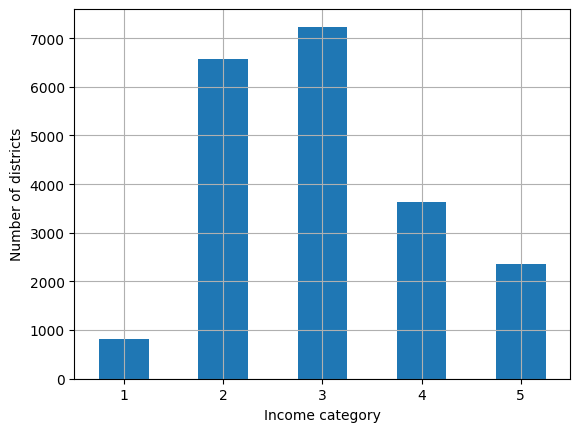

In [24]:
# Conta o número de ocorrências em cada categoria de 'income_cat',
# ordena os resultados pelo índice da categoria, e cria um gráfico de barras.
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

# Define o rótulo do eixo x como "Income category" (Categoria de renda).
plt.xlabel("Income category")

# Define o rótulo do eixo y como "Number of districts" (Número de distritos).
plt.ylabel("Number of districts")

# Exibe o gráfico de barras gerado.
plt.show()


### Resumo das Principais Funções e Importância do Scikit-Learn

#### Introdução
Scikit-Learn é uma das bibliotecas mais populares e amplamente utilizadas em Python para aprendizado de máquina. Ela oferece ferramentas eficientes para modelagem preditiva e análise de dados, incluindo classificação, regressão, clustering e redução de dimensionalidade.

#### Principais Funcionalidades e Funções

1. **Model Selection (Seleção de Modelos)**
   - **`train_test_split`**: Divide os dados em conjuntos de treinamento e teste, garantindo que os dados de teste não sejam usados para treinar o modelo.
     ```python
     from sklearn.model_selection import train_test_split
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     ```

   - **`cross_val_score`**: Avalia o desempenho do modelo usando validação cruzada, fornecendo uma estimativa mais robusta de sua eficácia.
     ```python
     from sklearn.model_selection import cross_val_score
     scores = cross_val_score(model, X, y, cv=5)
     ```

2. **Supervised Learning (Aprendizado Supervisionado)**
   - **Classificação**:
     - **`LogisticRegression`**: Algoritmo para problemas de classificação binária ou multiclasse.
       ```python
       from sklearn.linear_model import LogisticRegression
       model = LogisticRegression()
       model.fit(X_train, y_train)
       y_pred = model.predict(X_test)
       ```

     - **`DecisionTreeClassifier`**: Algoritmo baseado em árvore de decisão para classificação.
       ```python
       from sklearn.tree import DecisionTreeClassifier
       model = DecisionTreeClassifier()
       model.fit(X_train, y_train)
       y_pred = model.predict(X_test)
       ```

   - **Regressão**:
     - **`LinearRegression`**: Algoritmo para problemas de regressão linear.
       ```python
       from sklearn.linear_model import LinearRegression
       model = LinearRegression()
       model.fit(X_train, y_train)
       y_pred = model.predict(X_test)
       ```

     - **`Ridge`**: Regressão linear com regularização Ridge.
       ```python
       from sklearn.linear_model import Ridge
       model = Ridge()
       model.fit(X_train, y_train)
       y_pred = model.predict(X_test)
       ```

3. **Unsupervised Learning (Aprendizado Não Supervisionado)**
   - **Clustering**:
     - **`KMeans`**: Algoritmo de clustering baseado em centroides.
       ```python
       from sklearn.cluster import KMeans
       kmeans = KMeans(n_clusters=3)
       kmeans.fit(X)
       y_kmeans = kmeans.predict(X)
       ```

     - **`DBSCAN`**: Algoritmo de clustering baseado em densidade.
       ```python
       from sklearn.cluster import DBSCAN
       dbscan = DBSCAN()
       y_dbscan = dbscan.fit_predict(X)
       ```

   - **Redução de Dimensionalidade**:
     - **`PCA`**: Análise de Componentes Principais para redução de dimensionalidade.
       ```python
       from sklearn.decomposition import PCA
       pca = PCA(n_components=2)
       X_pca = pca.fit_transform(X)
       ```

     - **`TSNE`**: Técnica de Embedding Stocástico de Vizinhança t-distribuída para visualização de alta dimensionalidade.
       ```python
       from sklearn.manifold import TSNE
       tsne = TSNE(n_components=2)
       X_tsne = tsne.fit_transform(X)
       ```

4. **Metrics (Métricas de Avaliação)**
   - **`accuracy_score`**: Avalia a precisão de classificadores.
     ```python
     from sklearn.metrics import accuracy_score
     accuracy = accuracy_score(y_test, y_pred)
     ```

   - **`mean_squared_error`**: Calcula o erro quadrático médio para problemas de regressão.
     ```python
     from sklearn.metrics import mean_squared_error
     mse = mean_squared_error(y_test, y_pred)
     ```

   - **`confusion_matrix`**: Gera a matriz de confusão para avaliar classificadores.
     ```python
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
     ```

#### Importância do Scikit-Learn

1. **Facilidade de Uso**:
   - Interface consistente e fácil de usar.
   - Boas práticas de programação e documentação abrangente.

2. **Versatilidade**:
   - Suporte para uma ampla variedade de algoritmos de aprendizado de máquina.
   - Ferramentas para pré-processamento de dados, seleção de modelos e avaliação de desempenho.

3. **Integração com Outras Bibliotecas**:
   - Fácil integração com outras bibliotecas de ciência de dados, como Pandas, NumPy e Matplotlib.

4. **Comunidade Ativa**:
   - Comunidade grande e ativa, proporcionando um ecossistema rico de tutoriais, exemplos e suporte.

5. **Performance**:
   - Implementações eficientes dos algoritmos, garantindo bom desempenho mesmo em grandes conjuntos de dados.

Scikit-Learn é uma ferramenta essencial para cientistas de dados e engenheiros de aprendizado de máquina devido à sua simplicidade, versatilidade e capacidade de integrar-se facilmente com outras bibliotecas de Python.

In [25]:
# Importa a classe StratifiedShuffleSplit da biblioteca Scikit-Learn
from sklearn.model_selection import StratifiedShuffleSplit

# Cria uma instância de StratifiedShuffleSplit com 10 divisões (splits),
# tamanho do conjunto de teste de 20%, e uma semente aleatória de 42 para reprodutibilidade
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Cria uma lista vazia para armazenar os conjuntos de treinamento e teste estratificados
strat_splits = []

# Loop sobre as divisões criadas pelo StratifiedShuffleSplit
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # Seleciona os dados de treinamento com base nos índices fornecidos pelo splitter
    strat_train_set_n = housing.iloc[train_index]

    # Seleciona os dados de teste com base nos índices fornecidos pelo splitter
    strat_test_set_n = housing.iloc[test_index]

    # Adiciona o par de conjuntos de treinamento e teste à lista strat_splits
    strat_splits.append([strat_train_set_n, strat_test_set_n])


In [26]:
# Atribui o primeiro par de conjuntos de treinamento e teste estratificados da lista strat_splits
strat_train_set, strat_test_set = strat_splits[0]


In [27]:
# Importa a função train_test_split da biblioteca Scikit-Learn
from sklearn.model_selection import train_test_split

# Divide o DataFrame 'housing' em conjuntos de treinamento e teste
strat_train_set, strat_test_set = train_test_split(
    housing,                      # DataFrame a ser dividido
    test_size=0.2,                # Define que 20% dos dados serão usados como conjunto de teste
    stratify=housing["income_cat"], # Garante que a divisão mantenha a proporção da variável 'income_cat'
    random_state=42               # Semente aleatória para reprodutibilidade
)


In [28]:
# Calcula a contagem de cada categoria de 'income_cat' no conjunto de teste estratificado 'strat_test_set'
# e divide pelo número total de elementos no conjunto de teste para obter a proporção de cada categoria
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [29]:
# Itera sobre os conjuntos de treinamento e teste estratificados
for set_ in (strat_train_set, strat_test_set):
    # Remove a coluna 'income_cat' de cada conjunto de dados
    set_.drop("income_cat", axis=1, inplace=True)


##Finalidade
Este código remove a coluna income_cat dos conjuntos de treinamento (strat_train_set) e teste (strat_test_set) após a estratificação ter sido realizada. A coluna income_cat foi usada apenas para garantir que a divisão dos dados em treinamento e teste mantivesse a proporção correta de categorias de renda. Após a divisão, essa coluna não é mais necessária e pode ser removida dos conjuntos de dados para evitar que influencie futuras análises ou modelos.

#**3. Explore e visualize os dados para obter insights**

In [30]:
housing = strat_train_set.copy()          #cópia do conjunto de treinamento, para não mexer nos dados originais

## **Visualizando Dados Geográficos**

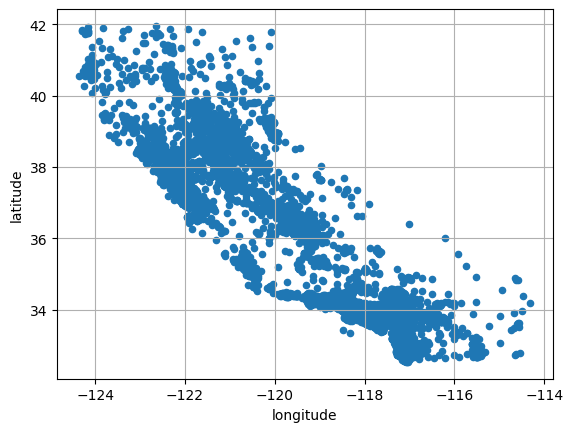

In [31]:
# Cria um gráfico de dispersão (scatter plot) do DataFrame 'housing'
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

# Exibe o gráfico
plt.show()


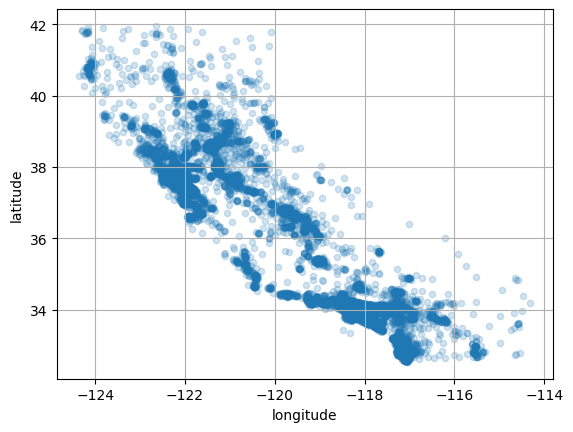

In [32]:
# Cria um gráfico de dispersão (scatter plot) do DataFrame 'housing'
# com transparência nos pontos (alpha=0.2) e grade visível (grid=True)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

# Exibe o gráfico
plt.show()


##Finalidade
Este código cria um gráfico de dispersão que mostra a distribuição geográfica dos dados no DataFrame housing. A transparência dos pontos (alpha=0.2) ajuda a visualizar melhor áreas onde há uma alta densidade de pontos, enquanto a grade (grid=True) fornece um contexto de referência espacial. Este tipo de visualização é útil para explorar padrões geográficos nos dados, como a distribuição de casas em uma área específica.

No contexto de um gráfico de dispersão, a transparência dos pontos (definida pelo parâmetro alpha) controla o nível de opacidade dos pontos plotados. Um valor baixo de alpha torna os pontos mais transparentes, permitindo que você veja melhor quando há sobreposição de pontos.

No gráfico de dispersão, o parâmetro alpha controla a opacidade dos pontos. Um valor de alpha=1.0 significa que os pontos são completamente opacos (não transparentes), enquanto um valor de alpha=0.0 significa que os pontos são completamente transparentes e não visíveis. Valores intermediários entre 0 e 1 determinam o grau de transparência dos pontos.

## Importância da Transparência
A transparência é especialmente útil em gráficos de dispersão quando há muitos pontos de dados que podem se sobrepor, o que é comum em conjuntos de dados grandes ou densamente distribuídos. Ajudando na interpretação visual sem perder informações de densidade dos dados.

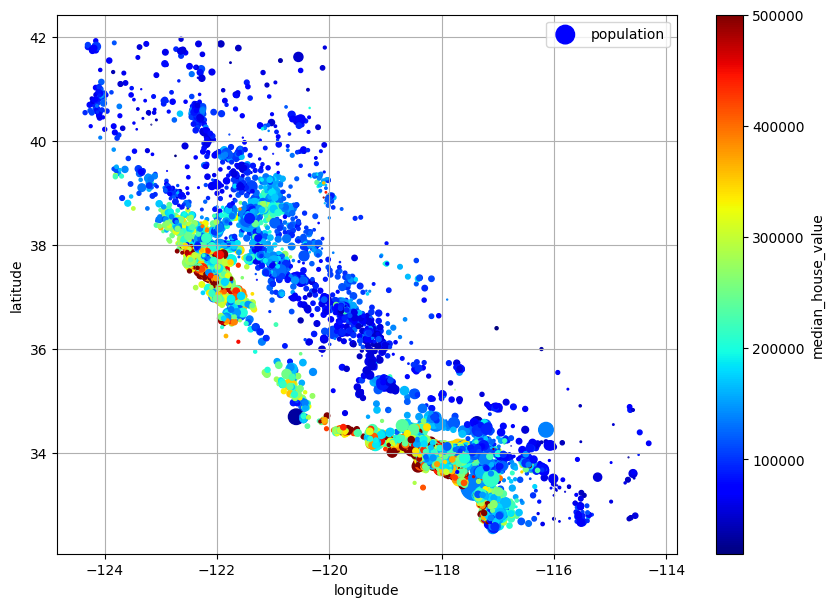

In [33]:
# Cria um gráfico de dispersão (scatter plot) com várias configurações
housing.plot(kind="scatter",               # Tipo de gráfico é de dispersão
             x="longitude", y="latitude",  # Eixos x e y são longitude e latitude
             grid=True,                    # Exibe uma grade no gráfico
             s=housing["population"] / 100, # Tamanho dos pontos proporcional à população
             label="population",           # Rótulo para a legenda referente ao tamanho dos pontos
             c="median_house_value",       # Cor dos pontos é definida pelo valor médio da casa
             cmap="jet",                   # Mapa de cores utilizado é "jet"
             colorbar=True,                # Exibe a barra de cores
             legend=True,                  # Exibe a legenda
             sharex=False,                 # Não compartilha o eixo x com outros subplots
             figsize=(10, 7))              # Tamanho da figura é 10x7 polegadas

# Exibe o gráfico
plt.show()

#**Buscando correlações**

In [37]:
# Select only the numerical columns before calculating correlations
numerical_housing = housing.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numerical data
corr_matrix = numerical_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)        # verifica a correlação de todos os atributos em relação a 'median_house_value'

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

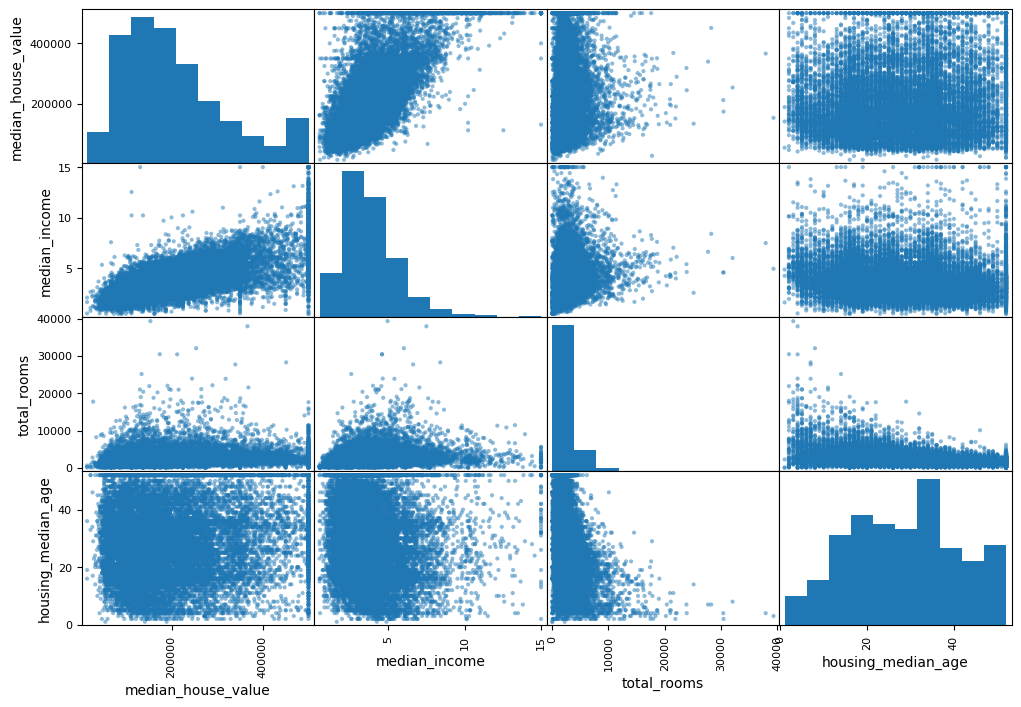

In [41]:
# Importa a função scatter_matrix do módulo pandas.plotting
from pandas.plotting import scatter_matrix

# Define os atributos que serão plotados na matriz de dispersão
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Cria uma matriz de gráficos de dispersão entre os atributos selecionados do DataFrame 'housing'
# O tamanho da figura é definido como 12 polegadas de largura por 8 polegadas de altura
scatter_matrix(housing[attributes], figsize=(12, 8))

# Exibe a matriz de gráficos de dispersão
plt.show()


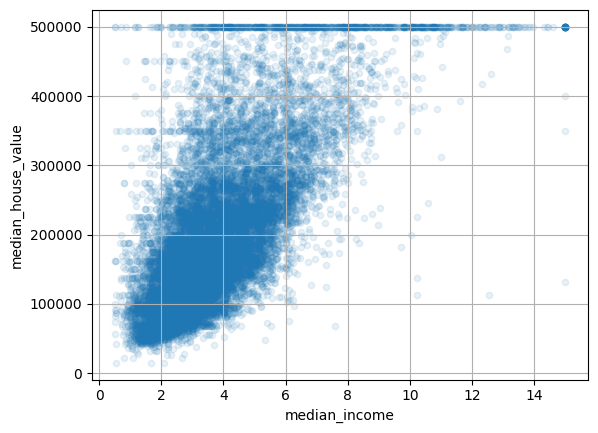

In [42]:
# Cria um gráfico de dispersão (scatter plot) entre 'median_income' e 'median_house_value'
# A transparência dos pontos é definida como 0.1 (alpha=0.1) para melhor visualização de sobreposições
# A grade é exibida no gráfico para facilitar a visualização (grid=True)
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

# Exibe o gráfico de dispersão
plt.show()

In [43]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [45]:
corr_matrix = (housing.select_dtypes(include=['number'])).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

# **Preparando os dados para algoritmos de aprendizado de máquina**

In [49]:
housing = strat_train_set.drop("median_house_value", axis=1)        #
housing_labels = strat_train_set["median_house_value"].copy()

No código fornecido:

```python
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
```

### Explicação Detalhada

1. **`housing = strat_train_set.drop("median_house_value", axis=1)`**:
   - `strat_train_set` é um DataFrame que representa o conjunto de treinamento estratificado, geralmente usado para treinar modelos de machine learning.
   - **`.drop("median_house_value", axis=1)`**: Este método `drop` é usado para criar uma cópia do DataFrame `strat_train_set` sem a coluna `"median_house_value"`.
     - **`axis=1`**: Indica que estamos removendo uma coluna (o eixo 1 refere-se às colunas, enquanto o eixo 0 refere-se às linhas).
   - A variável `housing` agora contém todos os atributos (características) dos dados de treinamento, exceto o valor da mediana do valor das casas, que é geralmente o alvo que queremos prever em um cenário de aprendizado supervisionado.

2. **`housing_labels = strat_train_set["median_house_value"].copy()`**:
   - **`strat_train_set["median_house_value"]`**: Acessa a coluna `"median_house_value"` do DataFrame `strat_train_set`, que contém os valores alvo que queremos prever.
   - **`.copy()`**: Realiza uma cópia dos dados da coluna `"median_house_value"`. Isso é feito para garantir que `housing_labels` seja uma nova instância de dados separada de `strat_train_set`, não apenas uma referência aos dados originais.
   - `housing_labels` agora contém os valores alvo associados aos dados de treinamento em `housing`.

### Motivação

- **Separar Dados e Alvos**: No aprendizado de máquina supervisionado, é comum separar os atributos (características) dos dados (`housing`) do valor alvo que queremos prever (`housing_labels`). Isso facilita o treinamento do modelo, pois ele aprenderá a relação entre os atributos em `housing` e os rótulos em `housing_labels`.

- **Evitar Vazamento de Dados**: Manter `housing_labels` como uma cópia separada garante que não haja vazamento de informações do valor alvo para os dados de treinamento, o que é crucial para avaliar corretamente o desempenho do modelo.

- **Facilitar a Manipulação de Dados**: `housing` agora contém apenas os atributos que serão usados para treinar o modelo, enquanto `housing_labels` contém os valores alvo correspondentes. Isso simplifica a manipulação e preparação dos dados antes de treinar o modelo de machine learning.

Em resumo, o código realizado separa os atributos (características) dos dados de treinamento (`housing`) do valor alvo que estamos tentando prever (`housing_labels`), seguindo práticas comuns no aprendizado de máquina supervisionado para preparar os dados para treinamento de modelo.

In [50]:
# Importa a classe SimpleImputer do módulo sklearn.impute
from sklearn.impute import SimpleImputer

# Cria uma instância de SimpleImputer com a estratégia de imputação definida como "median"
imputer = SimpleImputer(strategy="median")


# Seleciona apenas as colunas numéricas do DataFrame 'housing' e armazena em 'housing_num'
housing_num = housing.select_dtypes(include=[np.number])


# Calcula as estatísticas necessárias para a imputação dos valores ausentes nos dados numéricos
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [51]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [52]:
housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])